In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

In [ ]:
#Load the 'heart' CSV file
df = pd.read_csv("heart.csv")

print("Shape:", df.shape)
display(df.head())
df.info()
df.describe()

Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Target value counts:
target
1    526
0    499
Name: count, dtype: int64
Target proportions:
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


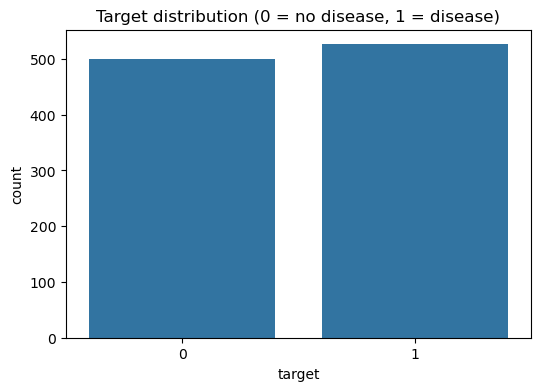

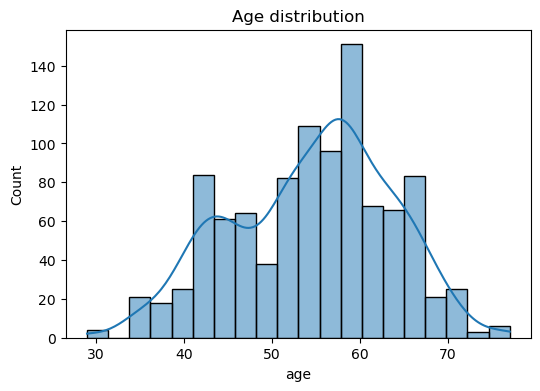

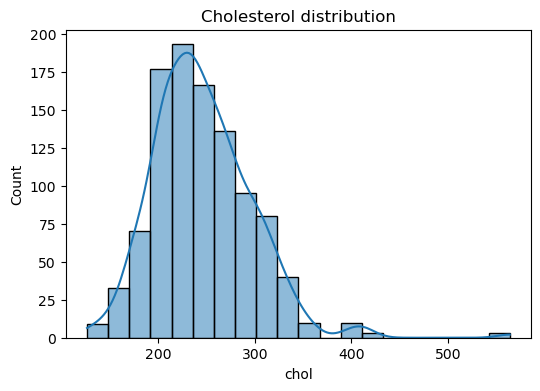

In [ ]:
#Check the missing values
print(df.isna().sum())

#Class balance of target
print("Target value counts:")
print(df["target"].value_counts())
print("Target proportions:")
print(df["target"].value_counts(normalize=True))

#Simple plots
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Target distribution (0 = no disease, 1 = disease)")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["chol"], bins=20, kde=True)
plt.title("Cholesterol distribution")
plt.show()

In [23]:
#Define the target and features
target_clm = "target"
y = df[target_clm]
X = df.drop(columns=[target_clm])

#Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("Train target proportions:")
print(y_train.value_counts(normalize=True))
print("Test target proportions:")
print(y_test.value_counts(normalize=True))

Train shape: (820, 13) (820,)
Test shape: (205, 13) (205,)
Train target proportions:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64
Test target proportions:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


In [24]:
#Initialise and fit scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)

#Transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled train shape: (820, 13)
Scaled test shape: (205, 13)


In [26]:
#Initialise Logistic Regression
lg_reg = LogisticRegression(
    solver="liblinear",
    random_state=42
)

# Fit model
lg_reg.fit(X_train_scaled, y_train)

#Predictions
y_pred_lgr = lg_reg.predict(X_test_scaled)
y_proba_lgr = lg_reg.predict_proba(X_test_scaled)[:, 1]

#Metrics
acc_lgr = accuracy_score(y_test, y_pred_lgr)
prec_lgr = precision_score(y_test, y_pred_lgr)
recall_lgr = recall_score(y_test, y_pred_lgr)
f1_lgr = f1_score(y_test, y_pred_lgr)
roc_auc_lgr = roc_auc_score(y_test, y_proba_lgr)

print("Logistic Regression metrics:")
print(f"Accuracy:  {acc_lgr:.3f}")
print(f"Precision: {prec_lgr:.3f}")
print(f"Recall:    {recall_lgr:.3f}")
print(f"F1-score:  {f1_lgr:.3f}")
print(f"ROC-AUC:   {roc_auc_lgr:.3f}")

print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, y_pred_lgr))

Logistic Regression metrics:
Accuracy:  0.810
Precision: 0.762
Recall:    0.914
F1-score:  0.831
ROC-AUC:   0.930

Classification report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



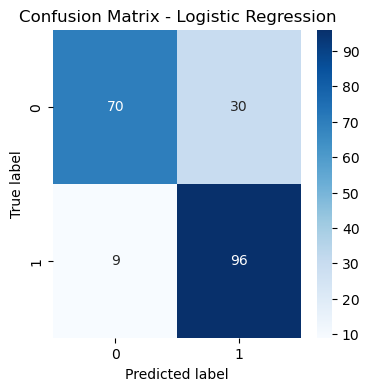

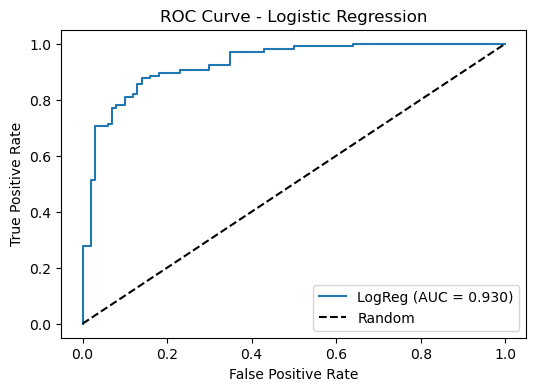

In [27]:
#Confusion matrix
cm_lgr = confusion_matrix(y_test, y_pred_lgr)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_lgr, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#ROC curve
fpr_lgr, tpr_lgr, _ = roc_curve(y_test, y_proba_lgr)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgr, tpr_lgr, label=f"LogReg (AUC = {roc_auc_lgr:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [28]:
#Initialise SVM classifier
svmc = SVC(
    kernel="rbf",        # you can try 'linear' too
    probability=True,    # needed for predict_proba and ROC-AUC
    random_state=42
)

#Fit the model
svmc.fit(X_train_scaled, y_train)

#Predictions
y_pred_svmc = svmc.predict(X_test_scaled)
y_proba_svmc = svmc.predict_proba(X_test_scaled)[:, 1]

#Metrics
acc_svmc = accuracy_score(y_test, y_pred_svmc)
prec_svmc = precision_score(y_test, y_pred_svmc)
recall_svmc = recall_score(y_test, y_pred_svmc)
f1_svmc = f1_score(y_test, y_pred_svmc)
roc_auc_svmc = roc_auc_score(y_test, y_proba_svmc)

print("SVM (SVC) metrics:")
print(f"Accuracy:  {acc_svmc:.3f}")
print(f"Precision: {prec_svmc:.3f}")
print(f"Recall:    {recall_svmc:.3f}")
print(f"F1-score:  {f1_svmc:.3f}")
print(f"ROC-AUC:   {roc_auc_svmc:.3f}")

print("\nClassification report (SVC):")
print(classification_report(y_test, y_pred_svmc))

SVM (SVC) metrics:
Accuracy:  0.927
Precision: 0.917
Recall:    0.943
F1-score:  0.930
ROC-AUC:   0.977

Classification report (SVC):
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



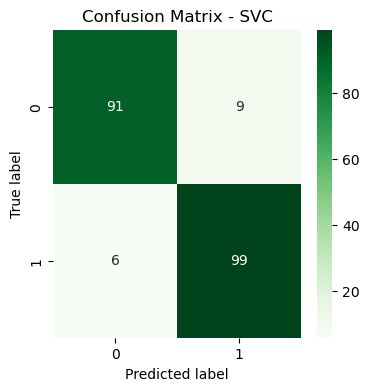

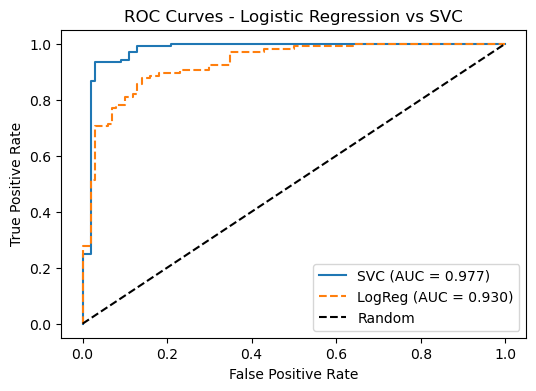

In [ ]:
#Confusion matrix
cm_svmc = confusion_matrix(y_test, y_pred_svmc)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svmc, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - SVC")
plt.show()

#ROC curve
fpr_svmc, tpr_svmc, _ = roc_curve(y_test, y_proba_svmc)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svmc, tpr_svmc, label=f"SVC (AUC = {roc_auc_svmc:.3f})")
plt.plot(fpr_lgr, tpr_lgr, label=f"LogReg (AUC = {roc_auc_lgr:.3f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Logistic Regression vs SVC")
plt.legend()
plt.show()

In [30]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVC (RBF)"],
    "Accuracy": [acc_lgr, acc_svmc],
    "Precision": [prec_lgr, prec_svmc],
    "Recall": [recall_lgr, recall_svmc],
    "F1": [f1_lgr, f1_svmc],
    "ROC_AUC": [roc_auc_lgr, roc_auc_svmc]
})

display(results)

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.809756,0.761905,0.914286,0.831169,0.929810
1,SVC (RBF),0.926829,0.916667,0.942857,0.929577,0.977143


In [31]:
#Testing Data
new_patient = {
    "age": 54,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 246,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.0,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

import pandas as pd
new_df = pd.DataFrame([new_patient])

# Use the same scaler fitted on training data
new_scaled = scaler.transform(new_df)

#Logistic Regression Class prediction (0 = no disease, 1 = disease)
pred_lr = lg_reg.predict(new_scaled)[0]

# Probability of heart disease (class 1)
prob_lr = lg_reg.predict_proba(new_scaled)[0, 1]

print("Logistic Regression prediction:", pred_lr)
print("Logistic Regression probability of heart disease:", prob_lr)

#SVM Class prediction (0 = no disease, 1 = disease)
pred_svc = svmc.predict(new_scaled)[0]
prob_svc = svmc.predict_proba(new_scaled)[0, 1]

print("SVC prediction:", pred_svc)
print("SVC probability of heart disease:", prob_svc)



Logistic Regression prediction: 1
Logistic Regression probability of heart disease: 0.6033231240958759
SVC prediction: 1
SVC probability of heart disease: 0.9272923362601637
